In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
A=pd.read_csv("iris.csv")
A

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
A.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [6]:
A['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
A['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='species'>

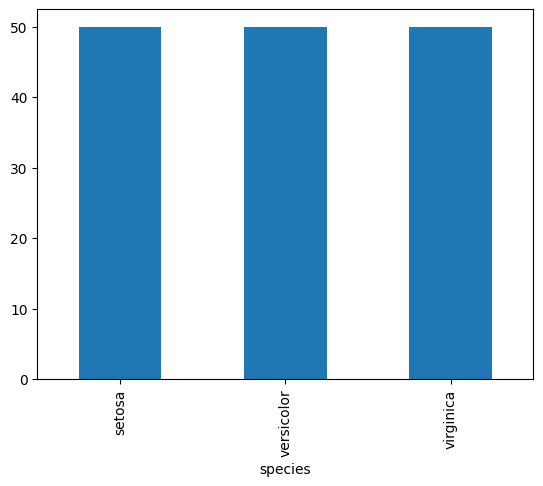

In [8]:
A['species'].value_counts().plot(kind='bar')

In [9]:
X=A.drop(columns=['species'])
Y=A[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species']= le.fit_transform(Y['species'])

In [12]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [13]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
import pickle
with open('LabelEnc.pkl','wb') as file1:
    pickle.dump(le,file1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pre = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [18]:
with open('Scaler.pkl','wb') as file2:
    pickle.dump(scaler, file2)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y, test_size=0.33, random_state=42)

In [20]:
xtrain.shape

(100, 4)

In [21]:
xtest.shape

(50, 4)

In [22]:
params = {'n_neighbors':[2,3,4,5,6,7,8]}

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knc = KNeighborsClassifier()
gscv = GridSearchCV(knc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [24]:
gscv.best_params_

{'n_neighbors': 3}

In [25]:
gscv.best_score_

0.9319552669552669

In [26]:
gscv.best_score_

0.9319552669552669

In [34]:
with open('best_knn.pkl','wb') as file3:
    pickle.dump(best_knn,file3)

NameError: name 'best_knn' is not defined

In [35]:
best_knn.score(xtrain,ytrain)

NameError: name 'best_knn' is not defined